In [1]:
import os
print(os.getcwd())
import cv2
import numpy as np
import torch
#import Model as net
import Model2classes as net2
import matplotlib.pyplot as plt

/home/shravani/Downloads/test_hsr


In [2]:
def decode_segmap_CS(image):
    road=[255, 0,0]
    sidewalk=[0, 0,0]
    buliding=[0, 255, 0]
    wall=[0,0,255]
    fence=[190,153,153]
    pole=[153,153,153]
    trafficlight=[250,170, 30]
    trafficsign=[220,220,  0]
    vegetation=[107,142, 35]
    terrain=[152,251,152]
    sky=[70,130,180]
    person=[220, 20, 60]
    rider=[0,  0,  255]
    car=[0,  0,142]
    truck=[0,  0, 70]
    bus=[0, 60,100]
    train=[0, 80,100]
    motorcycle=[0,  0,230]
    bicycle=[119, 11, 32]
    unlabelled=[0,0,0]

    label_colours = np.array([road,sidewalk,buliding,wall,fence,pole,trafficlight,trafficsign,
                              vegetation,terrain,sky,person,rider,car,truck,bus,train,
                              motorcycle,bicycle,unlabelled]).astype(np.uint8)
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for l in range(0, 20):
        r[image == l] = label_colours[l, 0]
        g[image == l] = label_colours[l, 1]
        b[image == l] = label_colours[l, 2]

    rgb = np.zeros((image.shape[0], image.shape[1], 3)).astype(np.uint8)
    rgb[:, :, 0] = b
    rgb[:, :, 1] = g
    rgb[:, :, 2] = r
    return rgb

In [3]:
def pre_process(img):
    img=img.astype(np.float32)
    for j in range(3):
        img[:, :, j] -= mean[j]
    for j in range(3):
        img[:, :, j] /= std[j]

    img /= 255
    return img

def forward(blob,model):
    blob=blob.transpose((2,0,1))
    tensor=torch.from_numpy(blob)
    tensor=torch.unsqueeze(tensor,0)
    output=model(tensor)
    output=output[0].max(0)[1].byte().cpu().data.numpy()
    return output

In [4]:
mean = [72.3923111, 82.90893555, 73.15840149]
std = [45.3192215, 46.15289307, 44.91483307]
## THESE MEAN AND STD MUST BE SAME AS THE ONES IN THE PICKLE FILE.....!!!!!

In [5]:
# espnet = net.ESPNet(20, 2, 8) # , "pretrained/encoder/espnet_p_2_q_8.pth"
# espnet.load_state_dict(torch.load("model_29.pth",map_location='cpu')) # "pretrained/encoder/model_20.pth"

espnet = net2.ESPNet(2,2,8)
device='cpu'
# 'cuda:0'
# espnet.load_state_dict(torch.load('C:/Users/Dell/PycharmProjects/ESPNet/pretrained/decoder/espnet_p_2_q_8.pth',map_location='cpu'))
espnet.load_state_dict(torch.load("/home/shravani/Downloads/test_hsr/model_10.pth",map_location='cpu')) # "pretrained/encoder/model_20.pth"


<All keys matched successfully>

In [18]:
import os
# z=espnet(torch.from_numpy(np.random.randint(50,size=(1,3,512,512))))
path = 'C:/Users/Dell/Desktop/hsr_data/train/input'
files = os.listdir(path)
i=np.random.randint(len(files))
iimg = cv2.imread(os.path.join(path,files[i]))

# img=cv2.imread('gracia_sidewalk.jpg')
img=pre_process(iimg)
output=forward(img,espnet)
color_map=decode_segmap_CS(output)
# color_map = cv2.cvtColor(color_map,cv2.COLOR_GRAY2RGB)
blend = cv2.addWeighted(iimg,0.5,color_map,0.5,0)
cv2.imshow('color_map',color_map)
cv2.imshow('orig',blend)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# import os
# # z=espnet(torch.from_numpy(np.random.randint(50,size=(1,3,512,512))))
# path = 'C:/Users/Dell/Desktop/hsr_data/train/input'
# files = os.listdir(path)
# i=np.random.randint(len(files))
# iimg = cv2.imread(os.path.join(path,files[i]))


cap = cv2.VideoCapture('/home/shravani/Downloads/trim.mov')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.resize(frame,(512,512))
    img=pre_process(frame)
    output=forward(img,espnet)
    color_map=decode_segmap_CS(output)
    # color_map = cv2.cvtColor(color_map,cv2.COLOR_GRAY2RGB)
    blend = cv2.addWeighted(frame,0.5,color_map,0.5,0)
#     cv2.imshow('color_map',color_map)
#     cv2.imshow('orig',blend)
    
    # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',blend)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# img=cv2.imread('gracia_sidewalk.jpg')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

KeyboardInterrupt: 

In [8]:
frame = cv2.imread('/home/shravani/Downloads/test1/test/000001.jpg')
frame

array([[[ 45,  36,  49],
        [ 38,  31,  44],
        [ 38,  34,  46],
        ...,
        [ 92,  82,  72],
        [ 97,  87,  77],
        [101,  91,  81]],

       [[ 48,  41,  54],
        [ 47,  43,  55],
        [ 58,  56,  68],
        ...,
        [ 91,  81,  71],
        [ 97,  87,  77],
        [101,  91,  81]],

       [[ 52,  53,  63],
        [ 51,  52,  62],
        [ 68,  70,  80],
        ...,
        [ 91,  81,  71],
        [ 96,  86,  76],
        [100,  90,  80]],

       ...,

       [[176, 172, 154],
        [179, 175, 157],
        [184, 180, 162],
        ...,
        [138, 132, 133],
        [138, 132, 133],
        [138, 132, 133]],

       [[177, 173, 155],
        [180, 176, 158],
        [185, 181, 163],
        ...,
        [138, 132, 133],
        [138, 132, 133],
        [138, 132, 133]],

       [[178, 174, 156],
        [181, 177, 159],
        [185, 181, 163],
        ...,
        [137, 131, 132],
        [137, 131, 132],
        [137, 131, 132]]

In [24]:
import os
path1 = '/home/shravani/Downloads/test1/test/'
path2 = '/home/shravani/Documents/test2/'
img_dir = os.listdir(path1)
img_dir.sort()
img_dir[0]

'000001.jpg'

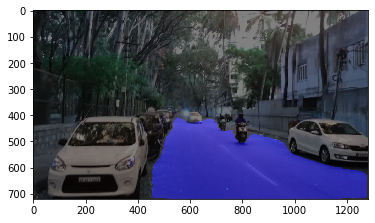

In [25]:
for i in range(0,900):
    if(i%5==3):
        frame = cv2.imread(path1+img_dir[i])
#frame = cv2.resize(frame,(512,512))
        img=pre_process(frame)
        output=forward(img,espnet)
        color_map=decode_segmap_CS(output)
    # color_map = cv2.cvtColor(color_map,cv2.COLOR_GRAY2RGB)
        blend = cv2.addWeighted(frame,0.5,color_map,0.5,0)
#cv2.imshow('frame',blend)
        plt.imshow(blend)
        cv2.imwrite(path2+img_dir[i],  cv2.cvtColor(blend, cv2.COLOR_RGB2BGR))

In [37]:
path3 = '/home/shravani/Documents/overlapped/'
path4 = '/home/shravani/Documents/direction2/'
img_dir1 = os.listdir(path2)
img_dir1.sort()
#print(len(img_dir1))
img_dir2 = os.listdir(path4)
img_dir2.sort()
print(len(img_dir2))

180


In [41]:
from PIL import Image
for j in range(0,len(img_dir1)):
    background = Image.open(path4+img_dir2[j])
    overlay = Image.open(path2+img_dir1[j])

    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")

    new_img = Image.blend(background, overlay, 0.5)
    new_img.save(path3+img_dir1[j][:-4]+'.png',"PNG")

In [17]:
color_map.shape,iimg.shape
color_map.dtype,iimg.dtype

(dtype('uint8'), dtype('uint8'))

In [20]:
rgb=decode_segmap_CS(op)
cv2.imshow('rgb',rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [159]:
orig_img = cv2.imread("gracia_sidewalk.jpg") #test/data/000750_leftImg8bit.png
#orig_img=cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
orig_img = cv2.resize(orig_img, (768, 384))
orig_img=orig_img[230:280,605:620]
print(orig_img.shape)
cv2.imshow("Input", orig_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 15, 3)


In [112]:
pol=cv2.imread('pole_sidewalk.jpg')
pol=pol[20:-30,30:-30]
print(pol.shape)
cv2.imshow("Input", pol)
cv2.imwrite("pole_sidewalk1.jpg", pol)
cv2.waitKey(0)
cv2.destroyAllWindows()

(120, 18, 3)


In [7]:
img=torch.Tensor(orig_img)
print(img.shape)
img=img.unsqueeze(0).transpose(1, 3).transpose(2, 3)
print(img.shape)
output = espnet(img)
print("Output", output.shape)

NameError: name 'orig_img' is not defined

In [66]:
decoded = decode_segmap_CS(np.squeeze(output.max(1)[1].numpy().astype(np.uint8),0))
mapp=np.where(decoded==(153,153,153),255,0).astype(np.uint8)
cv2.imshow("Output", decoded)
cv2.imshow("input",orig_img)
cv2.imshow("map",mapp)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("ESPNet E-40 D-30.png", decoded)

True

In [165]:
mapp=np.where(decoded==(153,153,153),255,0).astype(np.uint8)
mapp=cv2.erode(mapp,np.ones((5,5),np.uint8))
mapp=cv2.dilate(mapp,np.ones((3,3),np.uint8))
#mapp=cv2.erode(mapp,np.ones((3,3),np.uint8))
cv2.imshow('assaas',mapp)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [136]:
poles=cv2.bitwise_and(orig_img,mapp)
cv2.imshow('assaas',poles)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [162]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img_rgb = cv2.imread('gracia_sidewalk.jpg')
img_rgb=poles
print(type(img_rgb))
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('pole_sidewalk1.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
print('no of boxes: ',loc[0].shape)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imshow('sasa',img_rgb)
cv2.imwrite('res.png',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
no of boxes:  (0,)


In [166]:
z=np.random.randint(0,20,size=(200,200),dtype=np.uint8)

In [168]:
hist=np.histogram(z,bins=20)

In [170]:
np.sum(hist[0]),len(hist[0])

(40000, 20)